In [1]:

import pandas as pd
import numpy as np 
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt 
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import seaborn as sns 

In [2]:
# file_path = 'E:\Year_2_Semester_1\chemometrics\Exercises\M1\New_M2\Results\New_M2_results.csv'
df = pd.read_csv('New_M2_results.csv')

In [3]:
# change response to viscosity
df = df.rename(columns={'Response':'Viscosity'})
df

,Screen,pH,Speed,Viscosity
0,1,3,20,-1.47
1,1,3,60,2.99
2,1,3,100,0.43
3,1,6,20,-4.22
4,1,6,60,4.68
5,1,6,100,0.59
6,1,9,20,-5.36
7,1,9,60,7.56
8,1,9,100,0.82
9,2,3,60,2.47


In [4]:
# convert it to csv
Const_speed = df[df['Speed']==60].to_csv('Const_speed.csv', index=False)
df = pd.read_csv('Const_speed.csv')

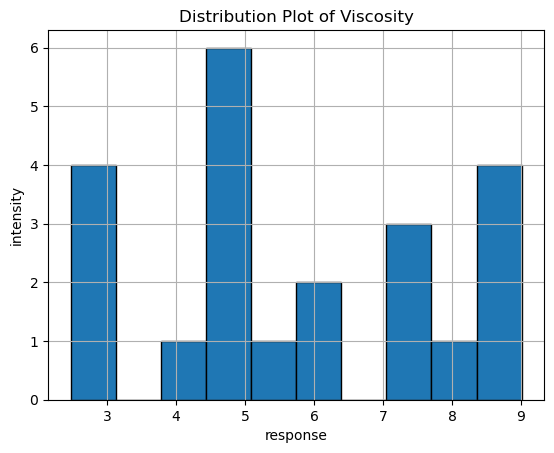

In [5]:
## test if normal distributed

#histgram
df['Viscosity'].hist(bins=10, edgecolor='black')
plt.title('Distribution Plot of Viscosity')
plt.xlabel('response')
plt.ylabel('intensity')
plt.show()


In [6]:
# Shapiro-wilks
nor_result = stats.shapiro(df['Viscosity'])
print(nor_result)

ShapiroResult(statistic=0.9293766802813064, pvalue=0.11908231932448521)


P_value = 0.5611 greater than 0.05, the data is normally distributed. 
Use ANOVA test.

In [7]:
# Extract each column from df
pH = df['pH']
Speed = df['Speed']

In [8]:
# create the model
# syntax ols('dependent_variable ~ independent_variable', data=dataset).fit()
model = ols('Viscosity ~ pH * Speed', data = df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
# anova_result_decimal = "{:.10f}".format(anova_result['PR(>F)'])
# # p_value = "{:.12f}".format(p_value)

# print(anova_result['PR(>F)'])
print(anova_result)

              sum_sq    df            F        PR(>F)
pH        248.089987   1.0   389.440066  1.393996e-14
Speed     731.982273   1.0  1149.031559  3.814524e-19
pH:Speed   85.083471   1.0   133.560057  2.635753e-10
Residual   12.740856  20.0          NaN           NaN


In [9]:
# plt.figure(figsize=(10, 12))
    
    
# ax = plt.axes(111, projection='3d')
# fg = ax.scatter3D(df['pH'], df['Speed'], df['Viscosity'], 
#                   cmap='coolwarm')

# # Set axis labels and title
# ax.set_xlabel('pH', fontweight='bold', fontsize=12)
# ax.set_ylabel('Speed', fontweight='bold',fontsize=12)
# ax.set_zlabel('Viscosity', fontweight='bold',fontsize=12)
# plt.title('3D plot')
# # Set angle in case zlabel can't show
# ax.view_init(elev=20, azim=30)
# plt.tight_layout()
# # Display the plot
# plt.show()

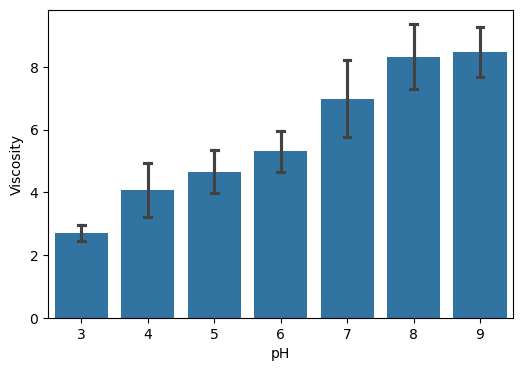

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='pH', y='Viscosity', errorbar='sd', capsize=0.1)
plt.show()

In [11]:
from scipy.stats import ttest_ind
from itertools import combinations

In [12]:
# post-hoc with T-test

levels = df['pH'].unique()
print(f'T-test of variable: pH')
for level1, level2 in combinations(levels, 2):
  group1 = df[df['pH'] == level1]['Viscosity'] 
  group2 = df[df['pH'] == level2]['Viscosity']
  t_stat, p_value = ttest_ind(group1, group2)
  print(f"{level1} vs {level2}: t_statistic: {t_stat}")
  if p_value < 0.05:
    print(f"{level1} vs {level2}: p_value: {p_value:.5f}")
  else:
    print('No significant difference')

T-test of variable: pH
3 vs 6: t_statistic: -6.367865049308927
3 vs 6: p_value: 0.00141
3 vs 9: t_statistic: -11.879061758212012
3 vs 9: p_value: 0.00029
3 vs 4: t_statistic: -2.6157290626483456
No significant difference
3 vs 5: t_statistic: -4.663289970667189
3 vs 5: p_value: 0.00957
3 vs 7: t_statistic: -5.904172891584764
3 vs 7: p_value: 0.00412
3 vs 8: t_statistic: -9.211920313399798
3 vs 8: p_value: 0.00077
6 vs 9: t_statistic: -5.797551778283328
6 vs 9: p_value: 0.00215
6 vs 4: t_statistic: 2.1737210907598743
No significant difference
6 vs 5: t_statistic: 1.2631834588374138
No significant difference
6 vs 7: t_statistic: -2.3648970457711713
No significant difference
6 vs 8: t_statistic: -4.813272898287871
6 vs 8: p_value: 0.00483
9 vs 4: t_statistic: 6.4955050331664745
9 vs 4: p_value: 0.00290
9 vs 5: t_statistic: 6.3032085645626745
9 vs 5: p_value: 0.00324
9 vs 7: t_statistic: 1.774350837777687
No significant difference
9 vs 8: t_statistic: 0.19538003357638203
No significant diff

In [13]:
# post-hoc with Tukry HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
pH_tukey = pairwise_tukeyhsd(df['Viscosity'], df['pH'])
print(pH_tukey)



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   1.3633 0.4411 -0.9167 3.6433  False
     3      5     1.96 0.1164   -0.32   4.24  False
     3      6   2.6017 0.0124  0.4689 4.7344   True
     3      7   4.2767 0.0002  1.9967 6.5567   True
     3      8     5.63    0.0    3.35   7.91   True
     3      9   5.7767    0.0  3.4967 8.0567   True
     4      5   0.5967 0.9695 -1.6833 2.8767  False
     4      6   1.2383 0.4733 -0.8944 3.3711  False
     4      7   2.9133 0.0086  0.6333 5.1933   True
     4      8   4.2667 0.0002  1.9867 6.5467   True
     4      9   4.4133 0.0002  2.1333 6.6933   True
     5      6   0.6417  0.942 -1.4911 2.7744  False
     5      7   2.3167 0.0452  0.0367 4.5967   True
     5      8     3.67 0.0011    1.39   5.95   True
     5      9   3.8167 0.0007  1.5367 6.0967   True
     6      7    1.675 0.1771 -0.4577 3.8077  False
     6      

In [15]:
# linear regression

# x = df[['pH', 'Speed']]
# x = sm.add_constant(x)
# y = df['Viscosity']

# model = sm.OLS(y, x).fit()

# print(model.summary())

In [16]:
## change the order of pH from 9 to 3
df_pH_sorted = df.sort_values('pH', ascending=False)
pH_levels = df_pH_sorted['pH']
pH_levels

2     9
16    9
15    9
21    8
14    8
13    8
12    7
20    7
11    7
9     6
10    6
1     6
19    6
8     5
7     5
18    5
6     4
5     4
17    4
4     3
3     3
0     3
Name: pH, dtype: int64

In [17]:
# leverage 
pH_array = df_pH_sorted['pH'].to_numpy()
pH_array

array([9, 9, 9, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3],
      dtype=int64)

In [18]:
# Design Matrix
a = [1] * len(pH_array)  # create a list with same length of data_array
D = np.column_stack([a, pH_array]) # create matrxi with 1st column:1 and 2nd column value

In [19]:
D_T = D.T 

# D^T D 
D_T_D = np.dot(D_T, D)

# inverse of D^T D
D_T_D_inv = np.linalg.inv(D_T_D)

# multiply (1)D (2)D^T D^(-1) (3)D^T
H = np.dot(np.dot(D, D_T_D_inv), D_T)

C:\Users\Yao_L\AppData\Local\Temp\ipykernel_41744\333570114.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


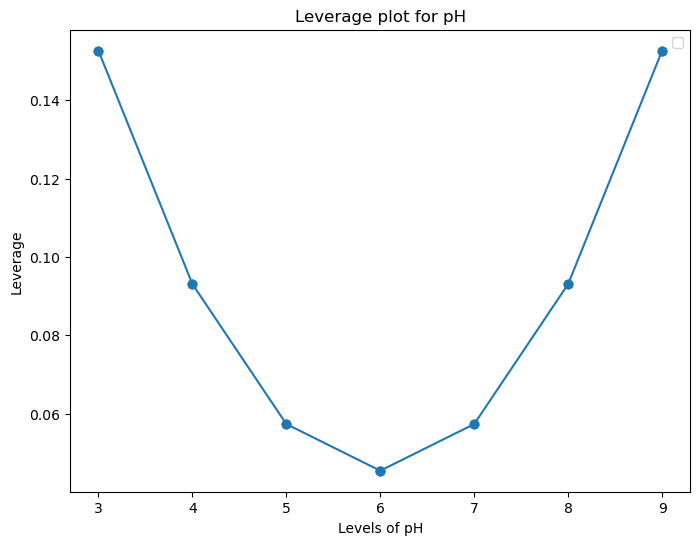

In [20]:
leverge = np.diagonal(H)
plt.figure(figsize=(8, 6))
plt.plot(pH_levels, leverge, 'o-')
plt.xlabel('Levels of pH')
plt.ylabel('Leverage')
plt.legend(fontsize=10)
plt.title('Leverage plot for pH')
plt.show()